In [215]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [216]:
def simulate(n,wartości,prawd):
    x = np.random.random(n)
    prawd_różn = 1
    for i in range(len(prawd)):
        prawd_różn = prawd_różn - prawd[-i-1]
        x[(prawd_różn<x) & (x<prawd_różn + prawd[-i-1])] = wartości[-i-1] 
    return x



In [224]:
prawd = [0.2,0.3,0.15,0.05,0.2,0.1]
wartości = [1,2,3,4,5,6]
N = 10000
X = simulate(N, wartości, prawd)
M = np.array([np.count_nonzero(X == x) for x in wartości])/N

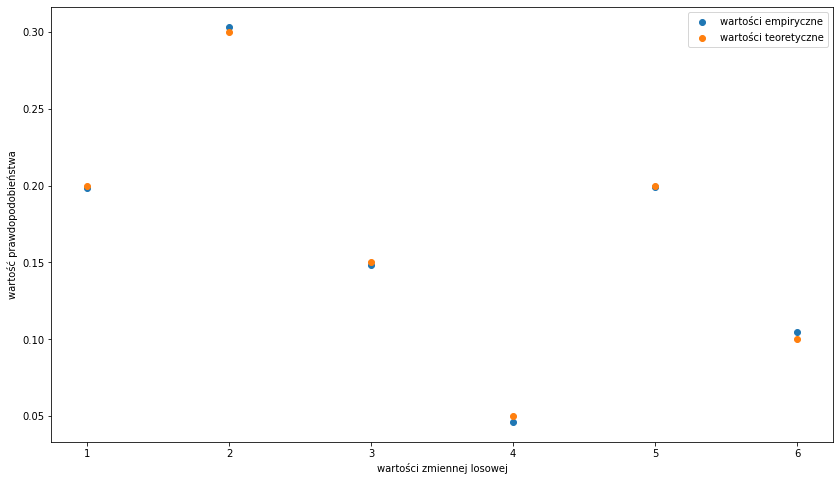

In [228]:
plt.figure(figsize=(14,8))
plt.scatter(np.arange(1,7,1),M, label='wartości empiryczne')
plt.scatter(np.arange(1,7,1),prawd, label = 'wartości teoretyczne')
plt.xlabel("wartości zmiennej losowej")
plt.ylabel("wartość prawdopodobieństwa")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Porównanie dystrybuanty empirycznej i teoretycznej')

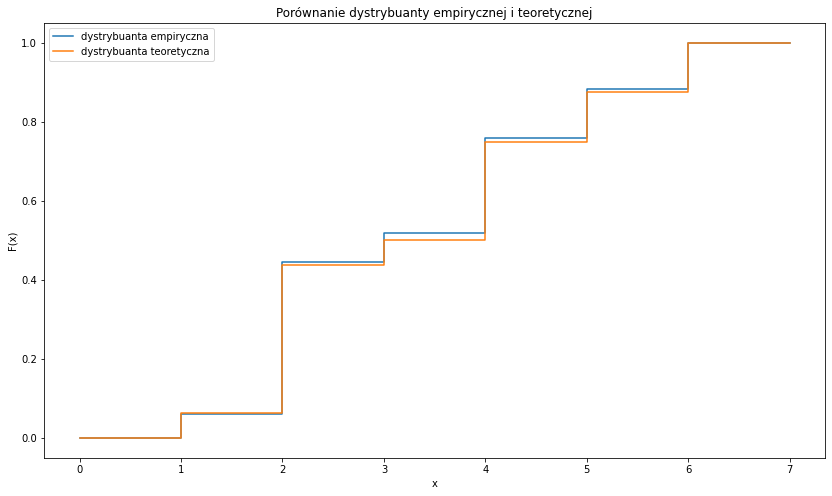

In [229]:
#zadanie 2
def dystrybuanta(X, num):
  X = [X[0]-1]+X+[X[-1]+1]
  Y = np.array([sum(num[:i+1]) for i in range(len(num))])
  Y = np.insert(Y, [0, 0], 0)
  return X, Y

  
def MetodaWymierna(an, n:int):
  I = np.floor(np.random.random(n)*sum(an))
  I = I.astype('int32')

  q = sum(an)
  seq = np.full(q, None)

  temp = 0
  for i in range(len(an)):
      seq[temp:temp+an[i]] = i+1
      temp += an[i]

  return np.array([seq[i] for i in I])

an = np.array([1,6,1,4,2,2])
q = sum(an)
prob_teo = an/q
n = len(an)
X = [i+1 for i in range(n)]
N = 1000

wymierna_lista = MetodaWymierna(an, N)
prob_emp = np.array([np.count_nonzero(wymierna_lista == x) for x in X])/N
X2, Y2 = dystrybuanta(X, prob_emp)
Xt2, Yt2 = dystrybuanta(X, prob_teo)

plt.figure(figsize=(14,8))
plt.step(X2, Y2, label='dystrybuanta empiryczna')
plt.step(Xt2, Yt2, label='dystrybuanta teoretyczna')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.title('Porównanie dystrybuanty empirycznej i teoretycznej')


In [221]:
def RozkladDwumianowy(n, p, N):
  u = np.random.random(N)

  prob = (1-p)**n
  prob_suma = prob

  for i in range(0, n+1):
    if i == 0:
      u[u <= prob_suma] = n + 1
    else:
      u[u <= prob_suma] = i
    
    prob = ((p/(1-p))*((n-i)/(i+1))*prob)
    prob_suma += prob
  u[u == n+1] = 0


  return u


In [222]:
#niech N = 1000, n = 20, p = 0.5
n = 20
p = 0.5
N = 10000
u = RozkladDwumianowy(n,p,N)
M = []
for i in range(0, n+1):
    M.append(np.count_nonzero(u == i))
M = np.array(M)/N

rv = stats.binom(n, p)
x = np.arange(stats.binom.ppf(0.001, n, p),
              stats.binom.ppf(0.999, n, p))

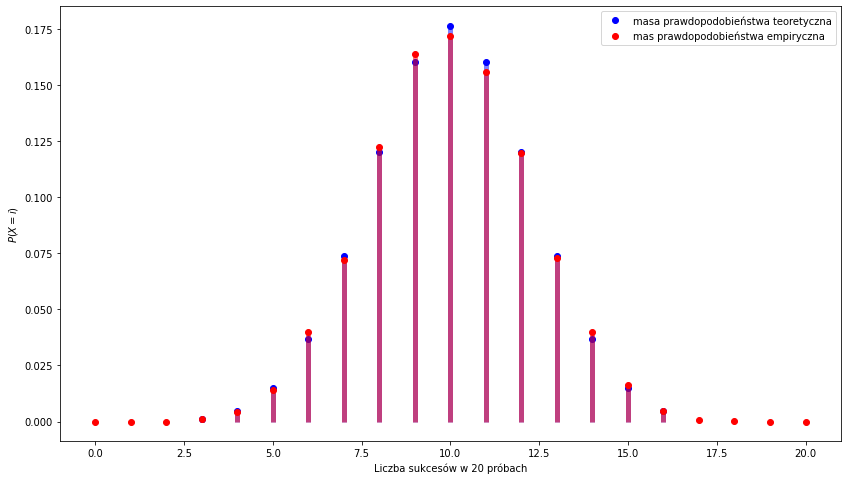

In [223]:
plt.figure(figsize=(14,8))
plt.plot(x, rv.pmf(x),'bo', label='masa prawdopodobieństwa teoretyczna')
plt.vlines(x, 0, rv.pmf(x), colors='b', lw=5, alpha=0.5)
plt.plot(np.arange(n+1),M,'ro', label='mas prawdopodobieństwa empiryczna')
plt.vlines(np.arange(n+1), 0, M, colors='r', lw=5, alpha=0.5)
plt.xlabel(f"Liczba sukcesów w {n} próbach")
plt.ylabel("$P(X=i)$")
plt.legend()
#przyznaję bez bicia, że kod z masą teoretyczną został niemalże spisany, jednakże następnym razem (gdy zapoznam się z dokumentacją scipy.stats) postaram się zrobić to całkowicie samemu.